## Preguntas Teóricas

## 1. ¿Qué es un paradigma de programación?
Un paradigma de programación es un conjunto de principios que guían cómo estructurar el código. Cada paradigma tiene un enfoque diferente sobre cómo estructurar y organizar el código. (Por ejemplo, la programación orientada a objetos (POO)).

## 2. ¿En qué se basa la programación orientada a objetos?
La POO se basa en la creación de clases y objetos que para modelar problemas del mundo real. Una clase es una plantillas comportamientos de los objetos. Los objetos son instancias de clases las cuales definen atributos y comportamientos. Los objetos interactúan entre sí mediante llamadas a métodos.

## 3. ¿Cuál es la diferencia entre recursividad e iteración, y cómo se relaciona esto con la notación Big O?
La recursividad es cuando una función se llama a sí misma, mientras que la iteración repite un bloque de código. La notación Big O mide la eficiencia de ambas, con la recursividad siendo generalmente más "costosa" en términos de espacio, mientras que la iteración puede ser más directa y eficiente.

## 4. Explicar la diferencia de rendimiento entre O(1) y O(n).
**O(1)** es tiempo constante, esto significa que el tiempo de ejecución no cambia con el tamaño de la entrada. **O(n)** es tiempo lineal, donde el tiempo de ejecución aumenta proporcionalmente al tamaño de la entrada.

## 5. ¿Cómo se calcula el orden en un programa que funciona por etapas?
Para calcular la complejidad de un programa con varias etapas, se suma la complejidad de cada etapa y se considera el paso con la mayor complejidad, ya que dominará el tiempo de ejecución total.

## 6. ¿Cómo se puede determinar la complejidad temporal de un algoritmo recursivo?
Se puede determinar usando una relación de recurrencia que mide cuántas veces se llama la función en función del tamaño de la entrada. Esto se resuelve con el teorema maestro.


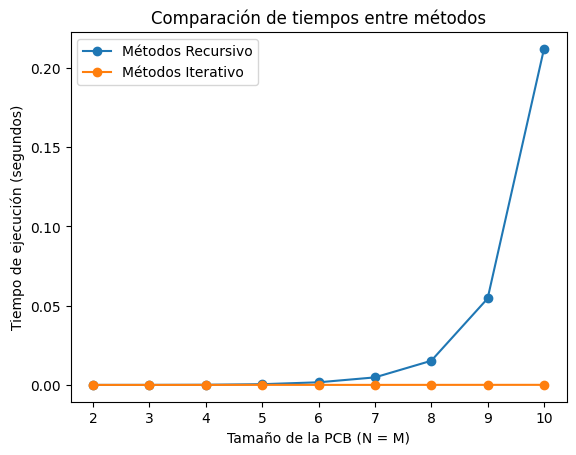

In [ ]:
import time
import matplotlib.pyplot as plt

def decorador(func):
    def nueva_func(*args, **kwargs):
        inicio = time.time()
        resultado = func(*args, **kwargs)
        fin = time.time()
        tiempo = fin - inicio
        return resultado, tiempo
    return nueva_func

class PCB:
    def __init__(self, N, M):
        self.N = N
        self.M = M

    @decorador
    def recursivo(self, x=0, y=0):
        if x == self.N - 1 and y == self.M - 1:
            return 1
        if x >= self.N or y >= self.M:
            return 0
        return self.recursivo(x + 1, y)[0] + self.recursivo(x, y + 1)[0]

    @decorador
    def iterativo(self):
        tabla = [[0 for _ in range(self.M)] for _ in range(self.N)]
        for i in range(self.N):
            for j in range(self.M):
                if i == 0 or j == 0:
                    tabla[i][j] = 1
                else:
                    tabla[i][j] = tabla[i-1][j] + tabla[i][j-1]
        return tabla[self.N-1][self.M-1]

def grafico(tamaños, tiempos_recursivo, tiempos_iterativo):
    plt.plot(tamaños, tiempos_recursivo, label='Métodos Recursivo', marker='o')
    plt.plot(tamaños, tiempos_iterativo, label='Métodos Iterativo', marker='o')
    plt.xlabel('Tamaño de la PCB (N = M)')
    plt.ylabel('Tiempo de ejecución (segundos)')
    plt.title('Comparación de tiempos entre métodos')
    plt.legend()
    plt.show()

def tiempos(tamaños):
    tiempos_recursivo = []
    tiempos_iterativo = []

    for t in tamaños:
        pcb = PCB(t, t)

        _, tiempo_r = pcb.recursivo()
        tiempos_recursivo.append(tiempo_r)

        _, tiempo_i = pcb.iterativo()
        tiempos_iterativo.append(tiempo_i)

    grafico(tamaños, tiempos_recursivo, tiempos_iterativo)

tamaños = [2, 3, 4, 5, 6, 7, 8, 9, 10]
tiempos(tamaños)